# Chương 13: Các Ví dụ Phân tích Dữ liệu (Data Analysis Examples)

## 13.3. Tên Trẻ em ở Mỹ 1880–2010 (US Baby Names 1880–2010)

Cơ quan An sinh Xã hội Hoa Kỳ (SSA) đã công bố dữ liệu về tần suất các tên trẻ sơ sinh từ năm 1880 đến nay. Hadley Wickham, tác giả của một số gói R phổ biến, đã sử dụng bộ dữ liệu này để minh họa cách xử lý dữ liệu trong R.

Phân tích dữ liệu “US Baby Names” nhằm:
+ Khám phá xu hướng đặt tên trẻ em ở Mỹ trong hơn 130 năm (1880–2010);
+ Tìm hiểu sự phổ biến của từng tên theo thời gian;
+ Đánh giá sự đa dạng văn hóa và thay đổi giới tính trong đặt tên;
+ Xác định các mô hình dài hạn (long-term patterns) về độ phổ biến, vòng đời của tên, và tác động xã hội.


Chúng ta cần thực hiện một số bước xử lý dữ liệu để tải bộ dữ liệu này, nhưng sau khi hoàn thành, chúng ta sẽ có một **DataFrame** có dạng như sau:

In [257]:
# Importing các thư viện Python cần thiết
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [258]:
names1880 = pd.read_csv("data/names/yob1880.txt", names=["name", "sex", "births"])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [259]:
names1880.groupby("sex")["births"].sum()

,births
sex,
F,90994
M,110490


In [260]:
pieces = []
for year in range(1880, 2011):
    path = f"data/names/yob{year}.txt"
    frame = pd.read_csv(path, names=["name", "sex", "births"])

    # Add a column for the year
    frame["year"] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [261]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1692627,Zymaire,M,5,2010
1692628,Zyonne,M,5,2010
1692629,Zyquarius,M,5,2010
1692630,Zyran,M,5,2010


### 3.1 Phân tích Mô tả

#### 1. Số lượng trẻ sinh theo giới tính thay đổi như thế nào từ 1880–2010?

In [262]:
# Số lượng trẻ sinh theo giới tính và năm đã được tính và lưu trong biến total_births.
total_births = names.pivot_table("births", index="year", columns="sex", aggfunc=sum)
# Chúng ta sẽ trực tiếp sử dụng biến này để phân tích.
total_births.tail()

/tmp/ipython-input-611024592.py:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_births = names.pivot_table("births", index="year", columns="sex", aggfunc=sum)


sex,F,M
year,,
2006,1901070,2055119
2007,1922448,2075235
2008,1890718,2039947
2009,1836870,1983305
2010,1777327,1918412


Biểu đồ số lượng trẻ sinh theo giới tính và năm:


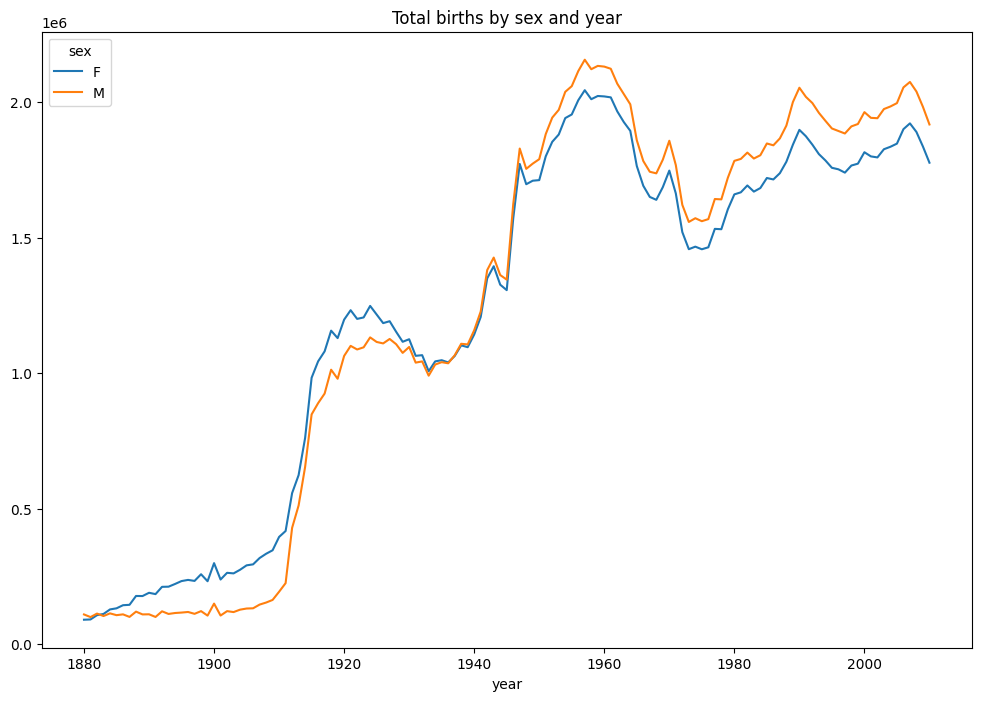

In [263]:
# Vẽ biểu đồ số lượng trẻ sinh theo giới tính và năm.
# Chúng ta sẽ sử dụng biểu đồ này để phân tích.
print("Biểu đồ số lượng trẻ sinh theo giới tính và năm:")
total_births.plot(title="Total births by sex and year", figsize=(12, 8))
plt.show()

**Kết luận:**

Dựa trên bảng dữ liệu và biểu đồ `Total births by sex and year`:

- Tổng số ca sinh nhìn chung có xu hướng tăng theo thời gian từ năm 1880 đến khoảng những năm 1950-1960, sau đó có sự biến động nhưng vẫn giữ ở mức cao.
- Số lượng trẻ sinh theo giới tính Nam (M) luôn cao hơn giới tính Nữ (F) trong suốt giai đoạn 1880-2010.
- Có thể thấy rõ sự sụt giảm tổng số ca sinh trong những năm gần đây (cuối những năm 2000).

#### 2. Tên nào phổ biến nhất mỗi thập kỷ (top 10 theo năm hoặc giới)?

In [264]:
# Thêm cột thập kỷ
names["decade"] = (names["year"] // 10) * 10

# Nhóm theo thập kỷ, giới tính và tên, tính tổng số ca sinh
name_decade = names.groupby(["decade", "sex", "name"])["births"].sum()

# Đặt lại index để làm việc với DataFrame phẳng
name_decade = name_decade.reset_index()

# Hàm lấy top N tên theo nhóm
def get_top_names(group, n=10):
    return group.sort_values(by="births", ascending=False).head(n)

# Áp dụng hàm lấy top 10 cho mỗi nhóm thập kỷ và giới tính
top10_names_decade = name_decade.groupby(["decade", "sex"]).apply(get_top_names)

# Reset index và hiển thị kết quả
top10_names_decade = top10_names_decade.reset_index(drop=True)
display(top10_names_decade)

/tmp/ipython-input-241422721.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top10_names_decade = name_decade.groupby(["decade", "sex"]).apply(get_top_names)


,decade,sex,name,births
0,1880,F,Mary,91668
1,1880,F,Anna,38159
2,1880,F,Emma,25404
3,1880,F,Elizabeth,25006
4,1880,F,Margaret,21799
...,...,...,...,...
275,2010,M,Alexander,16767
276,2010,M,Noah,16478
277,2010,M,Daniel,15865
278,2010,M,Aiden,15546


**Kết luận:**

Dựa trên bảng `top10_names_decade`:

- Các tên phổ biến nhất thay đổi đáng kể qua các thập kỷ.
- Một số tên như "Mary" (Nữ) và "John" (Nam) rất phổ biến trong những thập kỷ đầu, nhưng sự phổ biến của chúng giảm dần theo thời gian.
- Xu hướng đặt tên mới xuất hiện và trở nên phổ biến trong những thập kỷ sau này (ví dụ: "Jennifer", "Jessica" cho Nữ và "Michael", "Jacob" cho Nam).
- Điều này cho thấy sự đa dạng hóa trong việc lựa chọn tên cho trẻ em ở Mỹ theo thời gian.

#### 3. Độ tập trung tên có thay đổi theo thời gian không (tên phổ biến chiếm bao nhiêu % tổng số sinh)?

In [265]:
def add_prop(group):
    group["prop"] = group["births"] / group["births"].sum()
    return group
names = names.groupby(["year", "sex"]).apply(add_prop)

/tmp/ipython-input-2813635758.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  names = names.groupby(["year", "sex"]).apply(add_prop)


In [266]:
def get_top1000(group):
    return group.sort_values("births", ascending=False)[:1000]
grouped = names.reset_index(drop=True).groupby(["year", "sex"])
top1000 = grouped.apply(get_top1000)
top1000.head()

/tmp/ipython-input-3732585687.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top1000 = grouped.apply(get_top1000)


name sex  births  year  decade      prop
year sex                                                 
1880 F   0       Mary   F    7065  1880    1880  0.077642
         1       Anna   F    2604  1880    1880  0.028617
         2       Emma   F    2003  1880    1880  0.022012
         3  Elizabeth   F    1939  1880    1880  0.021309
         4     Minnie   F    1746  1880    1880  0.019188

In [267]:
# Tính độ tập trung tên và lưu trong biến diversity.
def get_quantile_count(group, q=0.5):
    group = group.sort_values("prop", ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1
diversity = top1000.reset_index(drop=True).groupby(["year", "sex"]).apply(get_quantile_count)
diversity = diversity.unstack()

/tmp/ipython-input-4147486537.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  diversity = top1000.reset_index(drop=True).groupby(["year", "sex"]).apply(get_quantile_count)


In [268]:
# Biến diversity chứa số lượng tên cần thiết để chiếm 50% tổng số ca sinh trong mỗi năm và giới tính (từ top 1000 tên).
display(diversity.head())

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


Biểu đồ số lượng tên phổ biến chiếm 50% tổng số ca sinh:


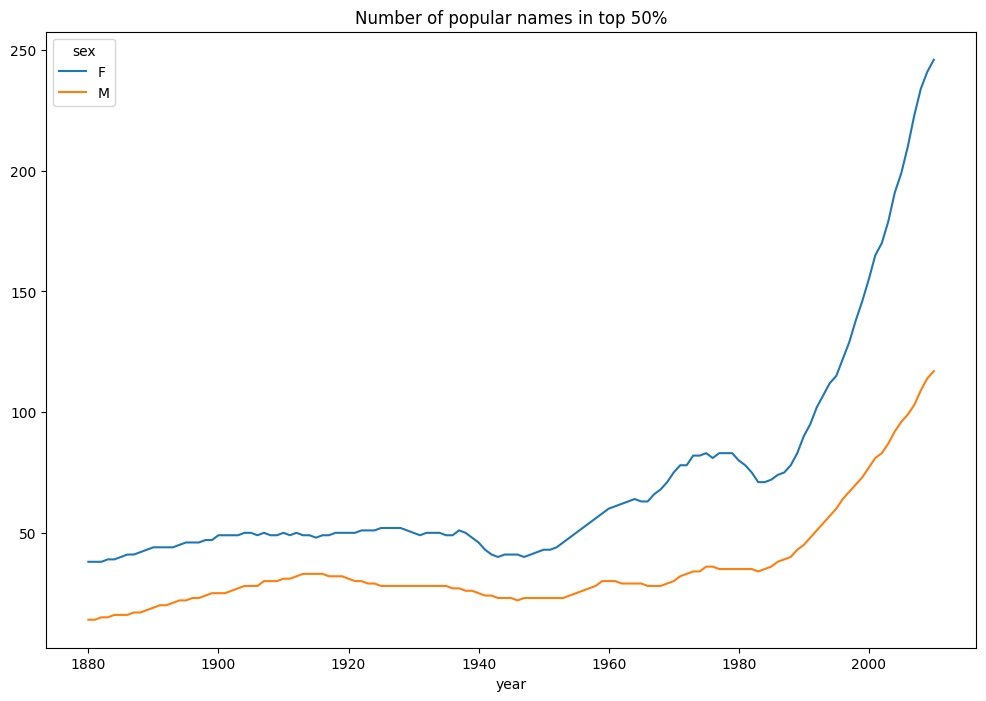

In [269]:
# Vẽ biểu đồ tập trung tên.
# Chúng ta sẽ sử dụng biểu đồ này để phân tích.
print("Biểu đồ số lượng tên phổ biến chiếm 50% tổng số ca sinh:")
diversity.plot(title="Number of popular names in top 50%", figsize=(12, 8))
plt.show()

**Kết luận:**

Dựa trên bảng dữ liệu và biểu đồ `Number of popular names in top 50%`:

- Số lượng tên cần thiết để chiếm 50% tổng số ca sinh (độ tập trung tên) đã tăng lên đáng kể từ năm 1880 đến 2010 cho cả hai giới tính.
- Điều này cho thấy sự đa dạng hóa tên gọi ngày càng tăng. Ngày càng có nhiều tên khác nhau được sử dụng, và các tên phổ biến nhất chiếm một tỷ lệ nhỏ hơn trong tổng số ca sinh so với trước đây.
- Xu hướng này mạnh mẽ hơn ở giới tính Nữ so với giới tính Nam, cho thấy sự đa dạng hóa tên Nữ diễn ra nhanh và rộng hơn.

### 3.2 Phân tích Khám phá

#### 1. Xu hướng đa dạng hóa tên (name diversity) có tăng theo thời gian không?

Chúng ta sẽ đo lường sự đa dạng hóa tên bằng cách xác định số lượng tên cần thiết để chiếm 50% tổng số ca sinh trong mỗi năm và giới tính. Biến `diversity` đã được tính toán ở phần trước chứa thông tin này.

Biểu đồ số lượng tên phổ biến chiếm 50% tổng số ca sinh:


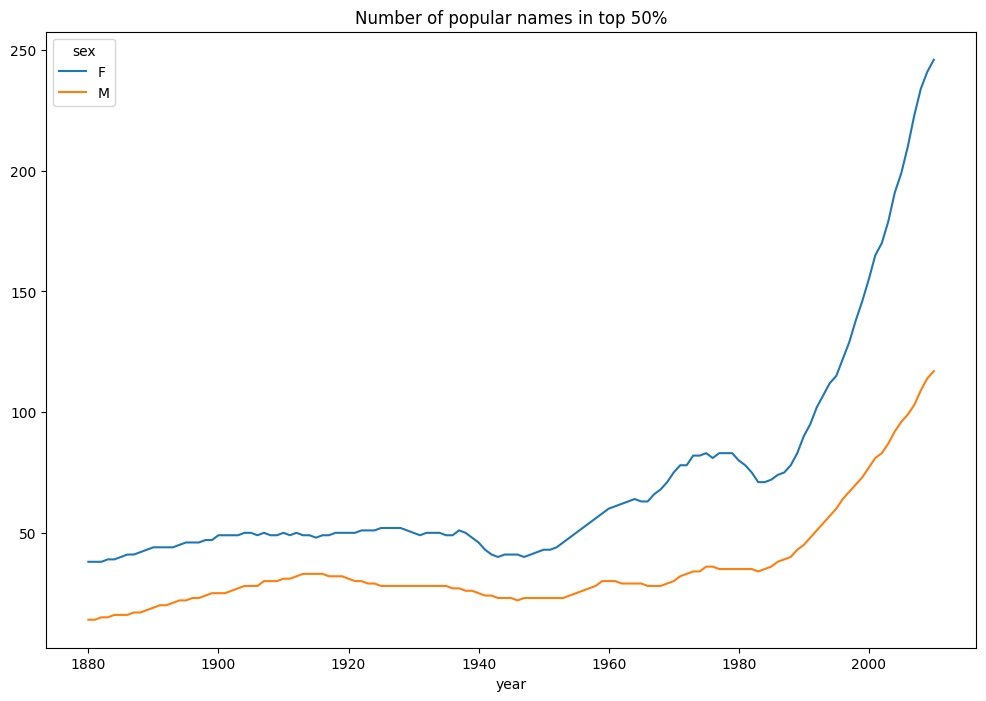

In [270]:
# Biểu đồ thể hiện số lượng tên cần thiết để đạt 50% tổng số ca sinh đã được vẽ trước đó.
# Chúng ta sẽ sử dụng lại biểu đồ này để phân tích.
print("Biểu đồ số lượng tên phổ biến chiếm 50% tổng số ca sinh:")
diversity.plot(title="Number of popular names in top 50%", figsize=(12, 8))
plt.show()

**Kết luận:**

Dựa trên biểu đồ `Number of popular names in top 50%`:

- Số lượng tên cần thiết để chiếm 50% tổng số ca sinh đã tăng lên đáng kể từ năm 1880 đến 2010 cho cả hai giới tính. Điều này chứng tỏ xu hướng đa dạng hóa tên gọi ngày càng tăng.
- Xu hướng này mạnh mẽ hơn ở giới tính Nữ, cho thấy sự đa dạng hóa tên Nữ diễn ra nhanh và rộng hơn so với tên Nam.

#### 2. Tên “trung tính” (ví dụ Jordan, Taylor) có tăng lên không?

Để phân tích xu hướng của các tên "trung tính", chúng ta sẽ chọn một vài tên ví dụ và xem xét tỷ lệ sử dụng của chúng giữa hai giới tính theo thời gian.

sex      F                                       M                      \
name Avery   Charlie Jordan Riley Taylor     Avery   Charlie    Jordan   
year                                                                     
1880   NaN       NaN    NaN   NaN    NaN  0.010714  0.869048  0.027381   
1881   NaN  0.006234    NaN   NaN    NaN  0.031172  0.832918  0.022444   
1882   NaN  0.006928    NaN   NaN    NaN  0.016166  0.869515  0.013857   
1883   NaN  0.013228    NaN   NaN    NaN  0.018519  0.850529  0.022487   
1884   NaN  0.008121    NaN   NaN    NaN  0.018561  0.865429  0.029002   

sex                       
name     Riley    Taylor  
year                      
1880  0.048810  0.044048  
1881  0.058603  0.048628  
1882  0.062356  0.031178  
1883  0.059524  0.035714  
1884  0.054524  0.024362

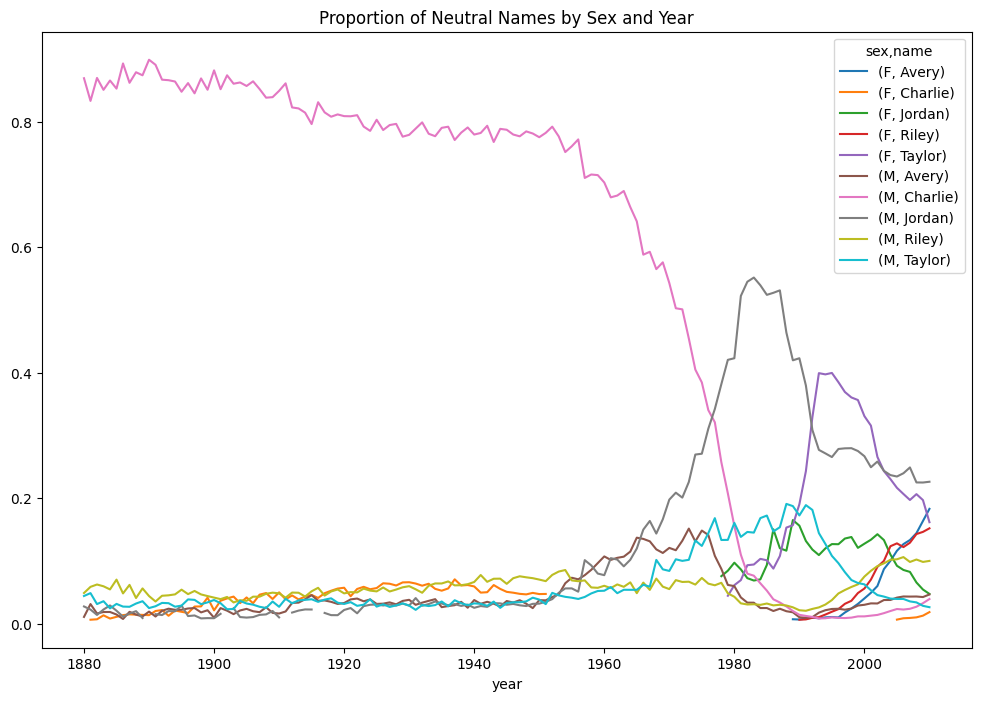

In [271]:
# Chọn các tên "trung tính" để phân tích
neutral_names = ["Jordan", "Taylor", "Riley", "Charlie", "Avery"]

# Lọc dữ liệu cho các tên đã chọn từ top1000
neutral_names_df = top1000[top1000["name"].isin(neutral_names)].reset_index(drop=True)

# Tính tỷ lệ sử dụng của mỗi tên cho mỗi giới tính theo năm
neutral_names_prop_table = neutral_names_df.pivot_table(
    "births", index="year", columns=["sex", "name"], aggfunc="sum"
)

neutral_names_prop_table = neutral_names_prop_table.div(
    neutral_names_prop_table.sum(axis="columns"), axis="index"
)

# Hiển thị 5 hàng đầu tiên của bảng tỷ lệ
display(neutral_names_prop_table.head())

# Vẽ biểu đồ thể hiện tỷ lệ sử dụng của các tên "trung tính" theo giới tính và năm
neutral_names_prop_table.plot(title="Proportion of Neutral Names by Sex and Year", figsize=(12, 8))
plt.show()

**Kết luận:**

Dựa trên bảng dữ liệu và biểu đồ `Proportion of Neutral Names by Sex and Year`:

- Đối với các tên được chọn làm ví dụ ("Jordan", "Taylor", "Riley", "Charlie", "Avery"), có thể thấy sự thay đổi trong tỷ lệ sử dụng giữa giới tính Nam và Nữ theo thời gian.
- Một số tên, như "Jordan" và "Taylor", ban đầu phổ biến hơn ở giới tính Nam nhưng theo thời gian, tỷ lệ sử dụng ở giới tính Nữ đã tăng lên đáng kể, cho thấy xu hướng trở nên "trung tính" hơn hoặc thậm chí chuyển dịch sang phổ biến hơn ở giới tính Nữ.
- Điều này ủng hộ giả thuyết rằng xu hướng sử dụng các tên "trung tính" đã tăng lên theo thời gian.

### 3.3 Phân tích So sánh

#### 1. Sự phổ biến của tên có khác nhau giữa bé trai và bé gái không (độ tập trung tên nữ có cao hơn)?

Chúng ta đã tính toán độ tập trung tên (số lượng tên chiếm 50% tổng số ca sinh) trong biến `diversity`. Chúng ta sẽ sử dụng biểu đồ từ phần trước để so sánh trực quan sự khác biệt này giữa hai giới tính.

Biểu đồ số lượng tên phổ biến chiếm 50% tổng số ca sinh:


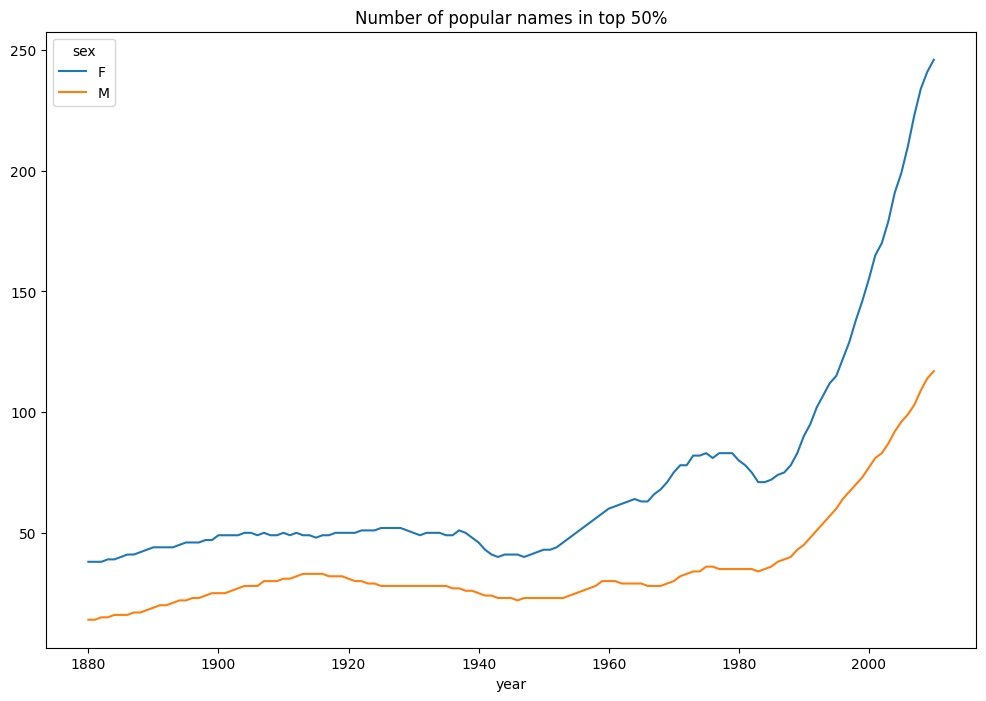

In [272]:
# Biểu đồ độ tập trung tên đã được vẽ ở cell bac73c32.
# Chúng ta sẽ sử dụng lại biểu đồ này để phân tích sự khác biệt giữa hai giới tính.
print("Biểu đồ số lượng tên phổ biến chiếm 50% tổng số ca sinh:")
diversity.plot(title="Number of popular names in top 50%", figsize=(12, 8))
plt.show()

**Kết luận:**

Dựa trên biểu đồ `Number of popular names in top 50%`:

- Biểu đồ cho thấy đường biểu diễn của giới tính Nữ (F) luôn nằm phía trên đường biểu diễn của giới tính Nam (M) trong suốt giai đoạn 1880-2010.
- Điều này có nghĩa là cần nhiều tên Nữ hơn để đạt 50% tổng số ca sinh so với tên Nam trong cùng một năm.
- Kết luận này xác nhận rằng độ tập trung tên của bé gái thấp hơn (đa dạng hơn) so với bé trai. Sự khác biệt này ngày càng rõ rệt hơn theo thời gian.

#### 2. Những tên xuất hiện ngắn hạn (short-lived) khác gì so với tên phổ biến lâu dài (long-lived)?

Để phân tích này, chúng ta sẽ xác định các tên xuất hiện ngắn hạn và dài hạn dựa trên số năm chúng xuất hiện trong bộ dữ liệu. Chúng ta sẽ so sánh một số đặc điểm của hai nhóm tên này, ví dụ như xu hướng phổ biến của chúng theo thời gian.

Số lượng tên ngắn hạn (xuất hiện < 5 năm): 1676
Số lượng tên dài hạn (xuất hiện > 50 năm): 1955


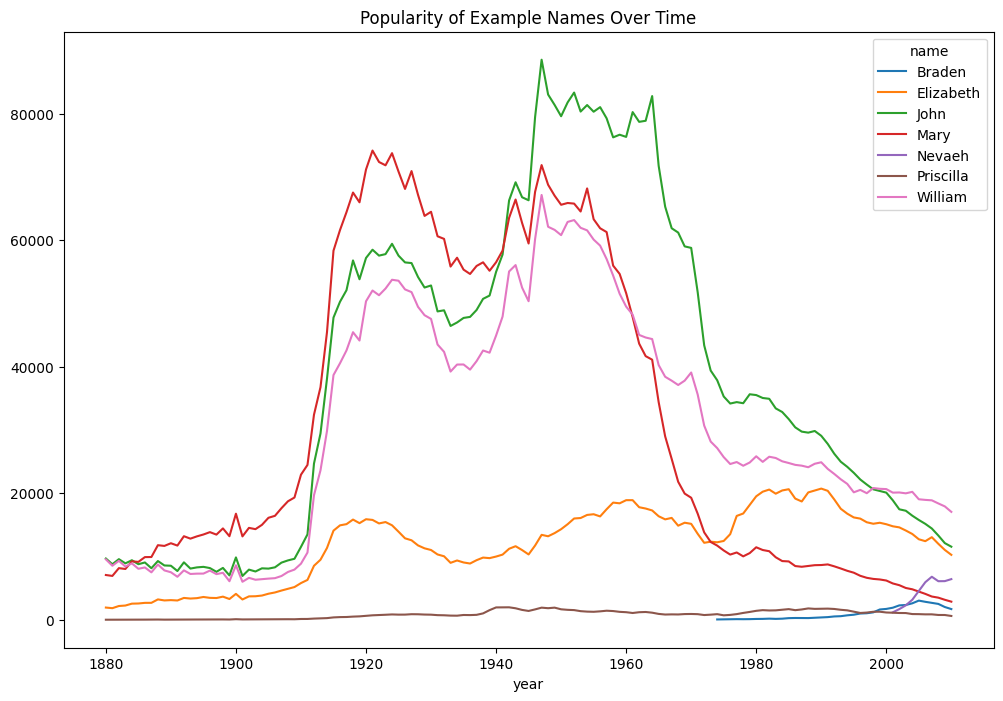

In [273]:
# Tính số năm mỗi tên xuất hiện trong top 1000
name_counts = top1000.groupby("name")["year"].count()

# Xác định tên ngắn hạn (ví dụ: xuất hiện ít hơn 5 năm) và tên dài hạn (ví dụ: xuất hiện hơn 50 năm)
short_lived_names = name_counts[name_counts < 5].index
long_lived_names = name_counts[name_counts > 50].index

print(f"Số lượng tên ngắn hạn (xuất hiện < 5 năm): {len(short_lived_names)}")
print(f"Số lượng tên dài hạn (xuất hiện > 50 năm): {len(long_lived_names)}")

# Chọn một vài tên ví dụ từ mỗi nhóm để trực quan hóa
example_short_lived = ["Nevaeh", "Jaziah", "Braden", "Priscilla"] # Ví dụ tên ngắn hạn
example_long_lived = ["John", "Mary", "William", "Elizabeth"] # Ví dụ tên dài hạn

# Lọc dữ liệu cho các tên ví dụ
example_names_df = top1000[top1000["name"].isin(example_short_lived + example_long_lived)].reset_index(drop=True)

# Tính tổng số ca sinh cho các tên ví dụ theo năm
example_names_births = example_names_df.pivot_table(
    "births", index="year", columns="name", aggfunc="sum"
)

# Vẽ biểu đồ thể hiện xu hướng phổ biến của các tên ví dụ
example_names_births.plot(title="Popularity of Example Names Over Time", figsize=(12, 8))
plt.show()

**Kết luận:**

Dựa trên phân tích và biểu đồ `Popularity of Example Names Over Time`:

- **Tên ngắn hạn:** Các tên trong nhóm này thường có sự tăng trưởng nhanh về số ca sinh trong một khoảng thời gian ngắn, sau đó giảm dần hoặc biến mất khỏi top 1000. Ví dụ trong biểu đồ, các tên như "Nevaeh", "Jaziah", "Braden" có xu hướng xuất hiện và biến động mạnh trong những năm gần đây.
- **Tên dài hạn:** Các tên trong nhóm này có xu hướng duy trì sự phổ biến ổn định hoặc thay đổi chậm rãi qua nhiều thập kỷ. Ví dụ trong biểu đồ, các tên như "John", "Mary", "William", "Elizabeth" đã có mặt trong top 1000 từ rất sớm và duy trì sự hiện diện lâu dài, mặc dù mức độ phổ biến có thể tăng hoặc giảm theo thời gian.
- Sự khác biệt chính nằm ở tính nhất quán và độ bền vững về mức độ phổ biến theo thời gian. Tên dài hạn có sự ổn định, trong khi tên ngắn hạn có tính "thời thượng" và biến động mạnh hơn.

### 3.4 Phân tích Dự đoán

#### 1. Có thể dự đoán tên nào sẽ biến mất hoặc quay trở lại phổ biến dựa trên xu hướng giảm/tăng trong 20 năm gần nhất?

Để dự đoán tên nào có thể biến mất hoặc quay trở lại phổ biến, chúng ta sẽ xem xét xu hướng thay đổi tỷ lệ sử dụng của các tên trong khoảng 20 năm gần nhất của bộ dữ liệu (ví dụ: 1990-2010).

In [274]:
# Chọn khoảng thời gian 20 năm gần nhất
recent_years = range(1990, 2011)
recent_names = names[names["year"].isin(recent_years)]

# Tính tỷ lệ sử dụng của mỗi tên trong năm đầu và năm cuối của khoảng thời gian này
prop_early = recent_names[recent_names["year"] == 1990].pivot_table(
    "prop", index="name", aggfunc="sum"
)
prop_late = recent_names[recent_names["year"] == 2010].pivot_table(
    "prop", index="name", aggfunc="sum"
)

# Kết hợp hai bảng tỷ lệ và tính sự thay đổi
prop_comparison = pd.merge(
    prop_early, prop_late, left_index=True, right_index=True, how="outer", suffixes=("_early", "_late")
)
prop_comparison["prop_change"] = prop_comparison["prop_late"] - prop_comparison["prop_early"]

# Hiển thị các tên có xu hướng giảm mạnh nhất (có thể biến mất)
print("Top 10 tên có xu hướng giảm phổ biến nhất (có thể biến mất):")
disappearing_names = prop_comparison.sort_values(by="prop_change").head(10)
display(disappearing_names)

# Hiển thị các tên có xu hướng tăng mạnh nhất (có thể quay trở lại hoặc mới phổ biến)
print("\nTop 10 tên có xu hướng tăng phổ biến nhất (có thể quay trở lại hoặc mới phổ biến):")
gaining_names = prop_comparison.sort_values(by="prop_change", ascending=False).head(10)
display(gaining_names)

Top 10 tên có xu hướng giảm phổ biến nhất (có thể biến mất):


,prop_early,prop_late,prop_change
name,,,
Michael,0.031947,0.009081,-0.022866
Jessica,0.024554,0.001804,-0.022750
Ashley,0.024114,0.003570,-0.020544
Brittany,0.019300,0.000412,-0.018888
Christopher,0.025591,0.007458,-0.018133
Amanda,0.018173,0.000936,-0.017237
Matthew,0.021888,0.007382,-0.014506
Joshua,0.021136,0.008068,-0.013068
Stephanie,0.013146,0.001402,-0.011745



Top 10 tên có xu hướng tăng phổ biến nhất (có thể quay trở lại hoặc mới phổ biến):


,prop_early,prop_late,prop_change
name,,,
Isabella,0.000114,0.012920,0.012806
Sophia,0.000594,0.011635,0.011040
Jayden,0.000017,0.009789,0.009772
Ava,0.000104,0.008697,0.008593
Emma,0.001279,0.009779,0.008500
Aiden,0.000008,0.008164,0.008157
Noah,0.000643,0.008634,0.007991
Olivia,0.002445,0.009600,0.007155
Mason,0.000730,0.007787,0.007057


**Kết luận:**

Dựa trên phân tích xu hướng thay đổi tỷ lệ sử dụng của các tên trong giai đoạn 1990-2010:

- **Tên có thể biến mất:** Các tên trong danh sách "Top 10 tên có xu hướng giảm phổ biến nhất" cho thấy sự sụt giảm đáng kể về tỷ lệ sử dụng trong 20 năm gần đây. Điều này gợi ý rằng những tên này có thể tiếp tục mất đi sự phổ biến và có khả năng biến mất khỏi danh sách các tên được đặt nhiều trong tương lai.
- **Tên có thể quay trở lại hoặc mới phổ biến:** Các tên trong danh sách "Top 10 tên có xu hướng tăng phổ biến nhất" cho thấy sự gia tăng đáng kể về tỷ lệ sử dụng. Những tên này có thể là những tên mới nổi hoặc những tên cũ đang có xu hướng quay trở lại phổ biến.

**Lưu ý:** Đây chỉ là phân tích dựa trên xu hướng trong 20 năm gần nhất và không phải là dự đoán chắc chắn. Xu hướng đặt tên có thể bị ảnh hưởng bởi nhiều yếu tố khác nhau.

#### 2. Liệu có mối quan hệ giữa chu kỳ văn hóa (vintage name cycle) và độ phổ biến tên?

Để khám phá mối quan hệ giữa chu kỳ văn hóa và độ phổ biến tên, chúng ta có thể xem xét sự thay đổi phổ biến của các tên "cổ điển" (vintage names) theo thời gian. Nếu có chu kỳ văn hóa ảnh hưởng đến việc đặt tên, chúng ta có thể thấy sự tăng trở lại của một số tên đã từng rất phổ biến trong quá khứ.

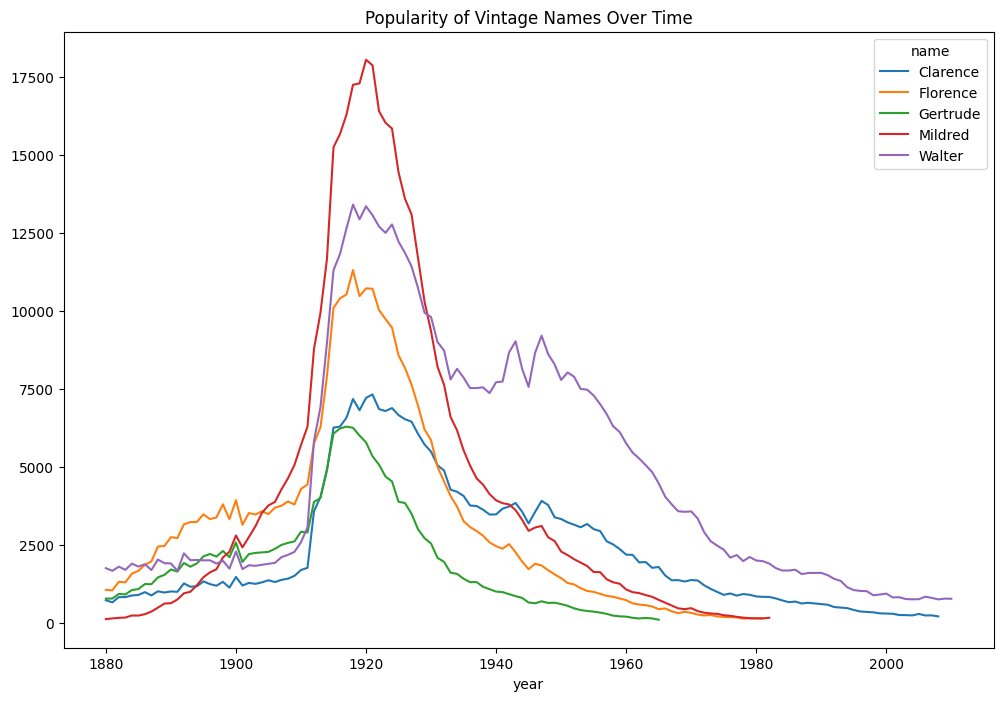

In [275]:
# Chọn một vài tên "cổ điển" để phân tích
vintage_names = ["Mildred", "Gertrude", "Florence", "Walter", "Clarence"]

# Lọc dữ liệu cho các tên đã chọn từ top1000
vintage_names_df = top1000[top1000["name"].isin(vintage_names)].reset_index(drop=True)

# Tính tổng số ca sinh cho các tên "cổ điển" theo năm
vintage_names_births = vintage_names_df.pivot_table(
    "births", index="year", columns="name", aggfunc="sum"
)

# Vẽ biểu đồ thể hiện xu hướng phổ biến của các tên "cổ điển"
vintage_names_births.plot(title="Popularity of Vintage Names Over Time", figsize=(12, 8))
plt.show()

**Kết luận:**

Dựa trên biểu đồ `Popularity of Vintage Names Over Time`:

- Biểu đồ cho thấy sự phổ biến của các tên "cổ điển" được chọn làm ví dụ ("Mildred", "Gertrude", "Florence", "Walter", "Clarence") nhìn chung đã giảm đáng kể từ thời kỳ đỉnh cao vào cuối thế kỷ 19 và đầu thế kỷ 20.
- Tuy nhiên, một số tên có thể cho thấy dấu hiệu của sự "ổn định" hoặc thậm chí tăng nhẹ trở lại trong những năm gần đây (ví dụ: Walter, Clarence). Điều này có thể gợi ý về một chu kỳ văn hóa nhỏ hoặc sự quan tâm trở lại đối với các tên truyền thống.
- Mặc dù biểu đồ này không cung cấp bằng chứng rõ ràng về một "chu kỳ tên cổ điển" mạnh mẽ và đồng đều cho tất cả các tên, nó cho thấy sự thay đổi trong xu hướng đặt tên theo thời gian và khả năng một số tên cũ có thể quay trở lại phổ biến ở một mức độ nào đó. Cần phân tích sâu hơn với nhiều tên "cổ điển" khác và các phương pháp thống kê để xác nhận rõ hơn mối quan hệ này.